<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2012%3A%20CRM%20%26%20Marketing%20Analytics/12_3_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CRM & Marketing Analytics**
## Customer Churn Analysis


In this case study, the churn behavior of telecom customers is predicted. Here, X is a telecommunication company providing its customers with various services. X wants to identify the customers who are likely to terminate the relationship or switch to any other provider. To do this, the company will analyze a [dataset](https://www.kaggle.com/mnassrib/telecom-churn-datasets) of 3333 records from Kaggle involving features related to customers' service usage.

In [ ]:
import pandas as pd
import numpy as np

##**Data Preparation & Feature Engineering Phase**

In [ ]:
#Dataset import
url='https://drive.google.com/file/d/1WgUu5jvoq9Pthf4qQUt-C7ZpIPWz3zOU/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path) 

In [ ]:
#The dataset consists of 3333 observations and 20 variables.
df.shape

(3333, 20)

To test the accuracy of the models to be developed the raw data is divided into two parts with an 80/20 ratio preserving the distribution of the classes. Thus, the training dataset has 2666 and the test dataset has 667 instances and 15% of each set represents instances for churned customers.

In [ ]:
#Split training & test data
train_dataset = df.loc[0:2665]
test_dataset = df.loc[2666:3332]
train_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
#Separate training & test data for labels and features
target_name="Churn" 
feature_names=train_dataset.columns.drop(target_name)

training_features = train_dataset[feature_names]
training_labels = train_dataset[target_name]

test_features = test_dataset[feature_names]
test_labels = test_dataset[target_name]

In [ ]:
training_features.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
#Check how many null values there are for each feature
#There is no missing value in the raw data
print('Number of null Rows in training_features ')
display(training_features.isna().sum())

Number of null Rows in training_features 


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
dtype: int64

In [ ]:
#Check data types of features
training_features.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
dtype: object

In [ ]:
categorical_features = training_features.select_dtypes(include=['object']).columns.tolist()
categorical_features


['State', 'International plan', 'Voice mail plan']

 'State', 'International plan', and 'Voice mail plan' are categorical features. The features 'International plan' and 'Voice mail plan' have a sequence of labels with values 'Yes' and 'No' while the feature 'State' has 51 unique labels. The other features are all numerical.

In [ ]:
print(training_features["State"].unique())
print("# of unique State values = " + str(len(training_features["State"].unique())))
print(training_features["International plan"].unique())
print(training_features["Voice mail plan"].unique())

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']
# of unique State values = 51
['No' 'Yes']
['Yes' 'No']


Following is a list of all variables and their descriptions, taken from the [Kaggle dataset.](https://www.kaggle.com/c/customer-churn-prediction-2020)



 Feature Name |  Data Type | Description
------------|--------------------|----------------------
state|string|2-letter code of the US state of customer residence
account_length|numerical|Number of months the customer has been receiving service at the current telco provider
area_code|string|'area_code_AAA' where AAA = 3 digit area code
international_plan|Yes or No|The customer has international plan
voice_mail_plan|Yes or No|The customer has voice mail plan
number_vmail_messages|numerical|Number of voice-mail messages
total_day_minutes|numerical|Total minutes of day calls
total_day_calls|numerical|Total number of day calls
total_day_charge|numerical|Total charge of day calls.
total_eve_minutes|numerical|Total minutes of evening calls
total_eve_calls|numerical|Total number of evening calls
total_eve_charge|numerical|Total charge of evening calls
total_night_minutes|numerical|Total minutes of night calls
total_night_calls|numerical|Total number of night calls
total_night_charge|numerical|Total charge of night calls
total_intl_minutes|numerical|Total minutes of international calls
total_intl_calls|numerical|Total number of international calls
total_intl_charge|numerical|Total charge of international calls
number_customer_service_calls|numerical|Number of calls to customer service
Churn|True or False|Customer churn - target variable

In [ ]:
training_labels

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Name: Churn, Length: 2666, dtype: bool

The label of each record for being churn or non-churn is represented by the feature "Churn". If a customer has churned then it is recorded with the label  "True", otherwise the label is "False".

Distribution of positive and negative classes for training set
Churn
False    2278
True      388
Name: State, dtype: int64


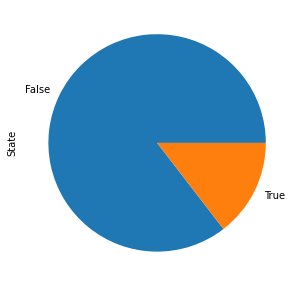

In [ ]:
print("Distribution of positive and negative classes for training set")
print(train_dataset.groupby([target_name]).count()["State"])
train_dataset.groupby([target_name]).count()["State"].plot.pie(figsize=(15, 5))

Distribution of positive and negative classes for test set
Churn
False    572
True      95
Name: State, dtype: int64


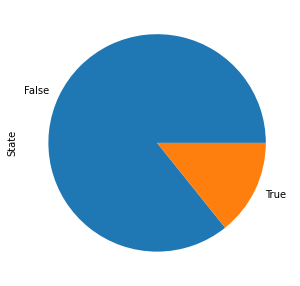

In [ ]:
print("Distribution of positive and negative classes for test set")
print(test_dataset.groupby([target_name]).count()["State"])
test_dataset.groupby([target_name]).count()["State"].plot.pie(figsize=(15, 5))

The three categorical features, 'State', 'International plan', and 'Voice mail plan', need to be encoded to allow numerical analysis. In the following code block, using One Hot Encoding that is a representation of categorical variables as binary vectors the feature of 'State' is represented by a 51 sized-vector, and the features 'International plan' and 'Voice mail plan' are transformed into vectors with two elements. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#Separate categorical and numeric features
#Encode categorical features 
#Concatenate encoded categorical features with numerical features and come up with fully numeric training & test features dataset
onehot_enc = OneHotEncoder()

training_onehotencoded_features = onehot_enc.fit_transform(training_features[categorical_features])
training_integer_features = training_features.drop(categorical_features, axis=1)

test_onehotencoded_features = onehot_enc.fit_transform(test_features[categorical_features])
test_integer_features = test_features.drop(categorical_features, axis=1)

In [ ]:
all_features_list = onehot_enc.get_feature_names().tolist() + training_integer_features.columns.tolist()
print("# of all features after one-hot encoding = {} ".format(len(all_features_list)))

encoded_training_features= np.concatenate((training_onehotencoded_features.todense(),training_integer_features.values),axis=1)
print("shape of training features dataset after one-hot encoding = {} ".format(encoded_training_features.shape))

encoded_test_features= np.concatenate((test_onehotencoded_features.todense(),test_integer_features.values),axis=1)
print("shape of test features dataset after one-hot encoding = {} ".format(encoded_test_features.shape))

print("shape of training labels dataset  = {} ".format(training_labels.shape))
print("shape of test labels dataset  = {} ".format(test_labels.shape))

# of all features after one-hot encoding = 71 
shape of training features dataset after one-hot encoding = (2666, 71) 
shape of test features dataset after one-hot encoding = (667, 71) 
shape of training labels dataset  = (2666,) 
shape of test labels dataset  = (667,) 


After encoding the features, the final dataset now comprises 71 features.

## **Modeling Phase**

The churn behavior of the company’s customers will be modeled using four different classification algorithms, including artificial intelligence applications along with basic statistical methods.

**Logistic Regression**
Logistic regression is a linear prediction model that is a type probabilistic statistical classification. It models the probabilities for the possible outcomes (class label **y**) of a sample as a logit-transformed multiple linear regression of the predictor features using a logistic function that has a S-shaped curve.

The logistic regression model is trained by maximizing the likelihood of the model. Thus, using the training dataset, it learns weight parameter w by minimizing a penalized cost function.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

logistic_reg = LogisticRegression(random_state=0,max_iter=10000)

# Other LogisticRegression parameter values, which are used as the default values of sklearn library, are listed below: 
# For detailed explanations of parameter values please visit ---->  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# penalty='l2'
# dual=False
# tol=0.0001
# C=1.0
# fit_intercept=True
# intercept_scaling=1
# class_weight=None
# solver='lbfgs'
# multi_class='auto'
# verbose=0
# warm_start=False
# n_jobs=None
# l1_ratio=None

logistic_reg.fit(encoded_training_features, training_labels)

lr_predictions = logistic_reg.predict(encoded_test_features)

lr_prediction_proba = logistic_reg.predict_proba(encoded_test_features)[:, 1]

First,  Logistic Regression model is initialized with default parameters excluding `max_iter` set as 10000. Then, the model is trained providing the encoded train dataset (`encoded_training_features`) to the model. The trained model now can be used to predict the labels for the encoded test dataset(`encoded_test_features`). Predicted probabilities for classes can be calculated to evaluate the model performance.

**Performance Criteria** \\
The model development process needs performance evaluation measures to evaluate a model and compare it with others. In order to measure the classification performance some of the performance criteria for model evaluation is used: \\
>**Accuracy:** The most common criterion is the accuracy by which the mean of the proportion of correct predictions concerning actual labels specific to the classes is represented.

>**F-score** also is used to evaluate the classfiers considering two  different performance measures. It is the way of combining precision and recall into a weighted harmonic mean, and it is called **F1 score** when the influence of precision and recall is equal.

There are two graphical illustration for performances of a classifier: 
>**Receiver operating characteristic (ROC) curve** plots a classifier’s performance at varied discrimination thresholds to reach a general conclusion about the classification success.

>**The confusion matrix** illustrates the accuracy of the classification by a matrix with true classes in rows and predicted classes in columns. 

Logistic Regression training accuracy  = 0.8709677419354839 
Logistic Regression test accuracy  = 0.8545727136431784 
Logistic Regression test AUC  = 0.8141516378358483 
Logistic Regression test f1  = 0.302158273381295 
[[549  23]
 [ 74  21]]


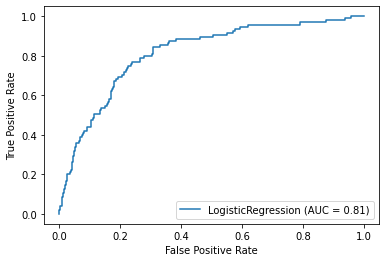

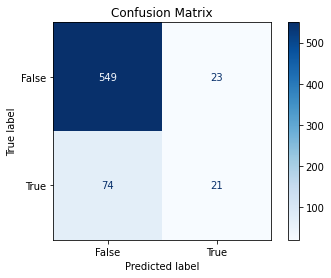

In [ ]:
lr_training_accuracy = logistic_reg.score(encoded_training_features, training_labels)
lr_test_accuracy = logistic_reg.score(encoded_test_features, test_labels)
lr_test_AUC=roc_auc_score(test_labels,lr_prediction_proba)
lr_test_f1=f1_score(test_labels,lr_predictions)

print("Logistic Regression training accuracy  = {} ".format(lr_training_accuracy))
print("Logistic Regression test accuracy  = {} ".format(lr_test_accuracy))
print("Logistic Regression test AUC  = {} ".format(lr_test_AUC))
print("Logistic Regression test f1  = {} ".format(lr_test_f1))


plot_roc_curve(logistic_reg, encoded_test_features, test_labels)  
disp = plot_confusion_matrix(logistic_reg, encoded_test_features, test_labels,cmap=plt.cm.Blues,values_format = '.5g')
disp.ax_.set_title("Confusion Matrix")

print( disp.confusion_matrix)

#### Considering the unbalanced distribution of positive & negative labels,
#### it seems that logistic regression results are not better than a default non-churn choice in terms of test accuracy. This shows us that whether more powerful
#### prediction algorithms or more complicated features are needed to come up with better predictions.

The trained Logistic Regression model correctly classifies 87% of the samples in the training dataset. However, a classifier's performance can only be accurately determined with the test dataset that is unseen during training. Accordingly, the classification accuracy of the developed model on the samples in the test dataset is %85. If there is a need to make an assessment about the success to identify the customers who actually churn, the confusion matrix should be observed. This model is only able to correctly label 21 customers who actually churn in the test dataset. This indicates that a model having better predictions should be developed.

The ROC curve above summarizes the general classification ability of our Logistic Regression classifier with area under the curve (AUC), which is 0.81.

**Artificial Neural Networks** Artificial Neural Networks (ANNs) are imitations of the way the human brain makes the underlying relationships in a dataset elicit. ANNs set up computational network models by connecting artificial neurons located in different layers. The information for mapping an input to the best output is stored by synaptic weights between the neurons in the network.

A trained ANN receives its inputs from the external world trough input layer, in turn, the output layer provides an output calculated using the information stored by weights in the hidden layers.

ANN is trained providing a the training dataset to learn the latent pattern in the data. By training, the weights are adjusted so that the inputs are transformed into outputs with a minimum error. The network propagetes the error backwards to minimize the error.

Neural Network training accuracy  = 0.8653413353338335 
Neural Network test accuracy  = 0.8545727136431784 
Neural Network test AUC  = 0.788387927861612 
Neural Network test f1  = 0.42603550295857995 
[[534  38]
 [ 59  36]]


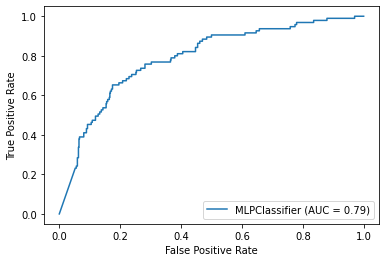

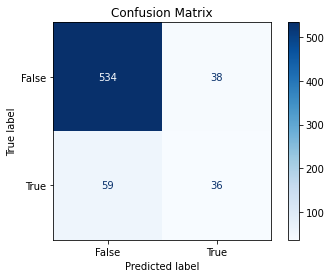

In [ ]:
###### Neural Network Classifier ######

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, f1_score, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

neuralnet = MLPClassifier(solver='adam', alpha=1e-5 ,learning_rate_init=0.01, hidden_layer_sizes=(5,5),max_iter=1000, random_state=10)

# Other Neural Metwork parameter values, which are used as the default values of sklearn library, are listed below: 
# For detailed explanations of parameter values please visit ---->  https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# activation='relu'
# batch_size='auto'
# learning_rate='constant'
# power_t=0.5
# shuffle=True
# tol=0.0001
# verbose=False
# warm_start=False
# momentum=0.9
# nesterovs_momentum=True
# early_stopping=False
# validation_fraction=0.1
# beta_1=0.9
# beta_2=0.999
# epsilon=1e-08
# n_iter_no_change=10
# max_fun=15000

neuralnet.fit(encoded_training_features, training_labels)
nn_predictions = neuralnet.predict(encoded_test_features)
nn_prediction_proba = neuralnet.predict_proba(encoded_test_features)[:, 1]

nn_training_accuracy = neuralnet.score(encoded_training_features, training_labels)
nn_test_accuracy = neuralnet.score(encoded_test_features, test_labels)
nn_test_AUC=roc_auc_score(test_labels,nn_prediction_proba)
nn_test_f1=f1_score(test_labels,nn_predictions)

print("Neural Network training accuracy  = {} ".format(nn_training_accuracy))
print("Neural Network test accuracy  = {} ".format(nn_test_accuracy))
print("Neural Network test AUC  = {} ".format(nn_test_AUC))
print("Neural Network test f1  = {} ".format(nn_test_f1))

plot_roc_curve(neuralnet, encoded_test_features, test_labels)  
disp = plot_confusion_matrix(neuralnet, encoded_test_features, test_labels,cmap=plt.cm.Blues,values_format = '.5g')
disp.ax_.set_title("Confusion Matrix")
print( disp.confusion_matrix)

#Neural network predictions are similar compared to logistic regression in terms of accuracy. There is still plenty of room for improvement

As in model development above, firstly, an MLP classifier model is initialized with default parameters excluding the settings `alpha=1e-5`, `learning_rate_init=0.01`, `hidden_layer_sizes=(5,5)`, `max_iter=1000`. The model is trained providing the encoded train dataset (`encoded_training_features`) to the model. The trained model then is used to predict the labels for the encoded test dataset (`encoded_test_features`).

The trained MLP classifier above correctly classifies nearly 87% of the samples in the training dataset. The classification accuracy of the model on test dataset is %85. These results are similar to the performance of Logistic Regression. However, the MLP classifier gives us an advantage to better classification for customers who actually churn in the test dataset with 36 correct samples (15 more samples than Logistic Regression).

The general classification ability of the MLP classifier with respect to AUC, which is 0.79, shows that there is still plenty of room for improvement.

**Random Forest** The Random Forest (RF) is an ensemble method. Ensemble methods build a set of classifiers (ensemble), such as decision trees, and aggregate their predictions. Each classifier model in an ensemble is trained independently on randomly generated data samples (each sample drawn with replacement) from the training set. For more accurate estimate, the overall prediction of individual classifiers is considered as prediction of ensemble. 

Random Forest training accuracy  = 0.9857464366091523 
Random Forest test accuracy  = 0.9430284857571214 
Random Forest test AUC  = 0.9217703349282297 
Random Forest test f1  = 0.7564102564102564 
[[570   2]
 [ 36  59]]


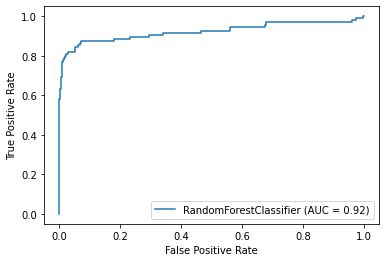

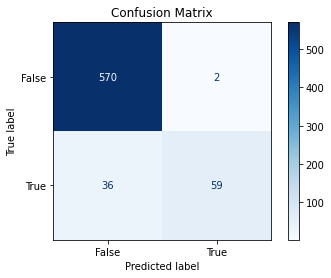

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

randomforest = RandomForestClassifier(n_estimators=150,max_depth=15, random_state=0)

# Other Random Forest parameter values, which are used as the default values of sklearn library, are listed below: 
# For detailed explanations of parameter values please visit ----> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# n_estimators=100
# criterion='gini'
# max_depth=None
# min_samples_split=2
# min_samples_leaf=1
# min_weight_fraction_leaf=0.0
# max_features='auto'
# max_leaf_nodes=None
# min_impurity_decrease=0.0
# min_impurity_split=None
# bootstrap=True
# oob_score=False
# n_jobs=None
# random_state=None
# verbose=0
# warm_start=False
# class_weight=None
# ccp_alpha=0.0
# max_samples=None

randomforest.fit(encoded_training_features, training_labels)
randomforest_predictions = randomforest.predict(encoded_test_features)

randomforest_prediction_proba = randomforest.predict_proba(encoded_test_features)[:, 1]

rf_training_accuracy = randomforest.score(encoded_training_features, training_labels)
rf_test_accuracy = randomforest.score(encoded_test_features, test_labels)
rf_test_AUC=roc_auc_score(test_labels,randomforest_prediction_proba)
rf_test_f1=f1_score(test_labels,randomforest_predictions)

print("Random Forest training accuracy  = {} ".format(rf_training_accuracy))
print("Random Forest test accuracy  = {} ".format(rf_test_accuracy))
print("Random Forest test AUC  = {} ".format(rf_test_AUC))
print("Random Forest test f1  = {} ".format(rf_test_f1))

plot_roc_curve(randomforest, encoded_test_features, test_labels)  
disp = plot_confusion_matrix(randomforest, encoded_test_features, test_labels,cmap=plt.cm.Blues,values_format = '.5g')
disp.ax_.set_title("Confusion Matrix")
print( disp.confusion_matrix)

#### Random forest predictions are the best among three algorithms we used so far. 
#### High number of one-hot encoded features and the power of ensemble prediction methods are some of the 
#### main reasons for this difference.

RF model is initialized with default parameters excluding the settings `n_estimators=150`, `max_depth=15`.The model is trained again providing the encoded train dataset (`encoded_training_features`) to the model and the model is used to predict the labels for the encoded test dataset (`encoded_test_features`).

The RF classifier accurately classifies nearly 98% of the samples in the training dataset. The classification accuracy of the model on test dataset is %94. These results are quite well comparing to Logistic Regression and MLP classifiers. 59 ones out of the customers who actually churn are accurately labeled through RF classifier.

The general classification ability of the RF classifier with respect to AUC is 0.92, which clearly shows the dominance of the RF considering this churn dataset.

**Gradient Boosting Trees** Gradient Boosting Trees (GBT) is an ensemble method, too. GBT also combines several week estimators (classifiers) learned by a certain algorithm in order to generate a strong estimator like RF does.  The model development, in GBT, is a sequential process in which each estimator learns from the errors of the previous estimators by minimizing their error.

GBM training accuracy  = 0.9609902475618904 
GBM test accuracy  = 0.9385307346326837 
GBM test AUC  = 0.9189547294810452 
GBM test f1  = 0.7484662576687117 
[[565   7]
 [ 34  61]]


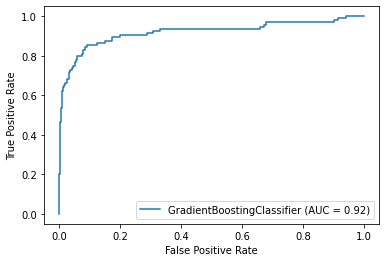

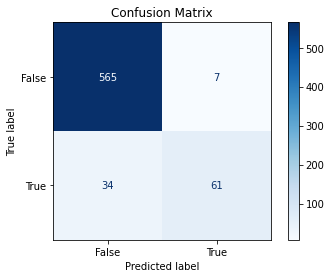

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, plot_roc_curve, plot_confusion_matrix
import matplotlib.pyplot as plt

gbm_classifier = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1,max_depth=2, random_state=0)

# Other GBM parameter values, which are used as the default values of sklearn library, are listed below:
#  For detailed explanations of parameter values please visit ---->  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# loss='deviance'
# subsample=1.0
# criterion='friedman_mse'
# min_samples_split=2
# min_samples_leaf=1
# min_weight_fraction_leaf=0.0
# min_impurity_decrease=0.0
# min_impurity_split=None
# init=None
# random_state=None
# max_features=None
# verbose=0
# max_leaf_nodes=None
# warm_start=False
# validation_fraction=0.1
# n_iter_no_change=None
# tol=0.0001
# ccp_alpha=0.0

gbm_classifier.fit(encoded_training_features, training_labels)
gbm_predictions = gbm_classifier.predict(encoded_test_features)
gbm_prediction_proba = gbm_classifier.predict_proba(encoded_test_features)[:, 1]

gbm_training_accuracy = gbm_classifier.score(encoded_training_features, training_labels)
gbm_test_accuracy = gbm_classifier.score(encoded_test_features, test_labels)
gbm_test_AUC=roc_auc_score(test_labels,gbm_prediction_proba)
gbm_test_f1=f1_score(test_labels,gbm_predictions)

print("GBM training accuracy  = {} ".format(gbm_training_accuracy))
print("GBM test accuracy  = {} ".format(gbm_test_accuracy))
print("GBM test AUC  = {} ".format(gbm_test_AUC))
print("GBM test f1  = {} ".format(gbm_test_f1))

plot_roc_curve(gbm_classifier, encoded_test_features, test_labels)  

disp = plot_confusion_matrix(gbm_classifier, encoded_test_features, test_labels,cmap=plt.cm.Blues,values_format = '.5g')
disp.ax_.set_title("Confusion Matrix")

print( disp.confusion_matrix)

#### GMB, predictions, which is another ensemble method, are very close to random forest prediction. 
### A hyperparameter optimization process may end up better results. Feel free to try using different parameter values.

GBT model is initialized with default parameters excluding the settings `n_estimators=150`, `learning_rate=0.1` and `max_depth=15`. The model is trained providing the encoded train dataset (`encoded_training_features`) to the model and the model is used to predict the labels for the encoded test dataset (`encoded_test_features`).

GBT classifier accurately classifies nearly 96% of the samples in the training dataset. The classification accuracy of the model on test dataset is %94. These results are also superior to Logistic Regression and MLP classifiers. This time, 61 ones out of the customers who actually churn are accurately labeled.

The general classification ability of the GBT classifier with respect to AUC is nearly 0.92, which is similar to the RF classifier.

In [ ]:
!pip install texttable
from texttable import Texttable
t = Texttable()
t.add_rows([['\033[1m'+' ',' ', 'Accuracy', ' ',' '],['Model', 'Training', 'Test', 'Test AUC', 'Test F1'], ['Logistic Regression', lr_training_accuracy, lr_test_accuracy, lr_test_AUC, lr_test_f1], ['Neural Network Classifier', nn_training_accuracy, nn_test_accuracy,nn_test_AUC,nn_test_f1], ['Random Forest', rf_training_accuracy,rf_test_accuracy,rf_test_AUC, rf_test_f1], ['Gradient Boosting Trees', gbm_training_accuracy,gbm_test_accuracy,gbm_test_AUC,gbm_test_f1]])
print(t.draw())

+---------------------------+----------+----------+----------+---------+
|                        |          | Accuracy |          |         |
+===========================+==========+==========+==========+=========+
| Model                     | Training | Test     | Test AUC | Test F1 |
+---------------------------+----------+----------+----------+---------+
| Logistic Regression       | 0.871    | 0.855    | 0.814    | 0.302   |
+---------------------------+----------+----------+----------+---------+
| Neural Network Classifier | 0.865    | 0.855    | 0.788    | 0.426   |
+---------------------------+----------+----------+----------+---------+
| Random Forest             | 0.986    | 0.943    | 0.922    | 0.756   |
+---------------------------+----------+----------+----------+---------+
| Gradient Boosting Trees   | 0.961    | 0.939    | 0.919    | 0.748   |
+---------------------------+----------+----------+----------+---------+


According to the table above results can be summarized by the following: \\
>The performance of the logistic regression is not better than a default non-churn choice in terms of test accuracy when one considers the unbalanced distribution of positive & negative labels (churn and non-churn). \\
>For the churn dataset used in this case study neural network predictions make no progress on the accuracy compared to logistic regression. \\
>While both RF and GBT outperform the other two methods, RF predictions are the best. The high number of one-hot encoded features and the power of ensemble prediction methods are some of the main reasons for this difference.
 